In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pickle
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import warnings
warnings.filterwarnings("ignore")

In [8]:
#Loading file containing values for each resolution, of 'area averaged' time series of pte terms around cyclone centre: dp_dt_sel/100, dfi_dt_sel/100, i_itt_sel/100, i_tadv_sel/100, i_vmt_sel/100 and i_diab_res_sel/100 (in hPa)
#See the pte time series script for calculation of these terms for each resolution

pte=np.load('/work/bb1018/b380723/pte/0.8/1m/pte_2deg_1m.npy')

dP_dt=[pte[0][0,10:22].mean(),pte[1][0,10:22].mean(),pte[2][0,10:22].mean(),pte[3][0,10:22].mean(),pte[4][0,10:22].mean(),pte[5][0,10:22].mean(),pte[6][0,10:22].mean(),pte[7][0,10:22].mean(),pte[8][0,10:22].mean()]
dfi_dt=[pte[0][1,10:22].mean(),pte[1][1,10:22].mean(),pte[2][1,10:22].mean(),pte[3][1,10:22].mean(),pte[4][1,10:22].mean(),pte[5][1,10:22].mean(),pte[6][1,10:22].mean(),pte[7][1,10:22].mean(),pte[8][1,10:22].mean()]
ITT=[pte[0][2,10:22].mean(),pte[1][2,10:22].mean(),pte[2][2,10:22].mean(),pte[3][2,10:22].mean(),pte[4][2,10:22].mean(),pte[5][2,10:22].mean(),pte[6][2,10:22].mean(),pte[7][2,10:22].mean(),pte[8][2,10:22].mean()]
TADV=[pte[0][3,10:22].mean(),pte[1][3,10:22].mean(),pte[2][3,10:22].mean(),pte[3][3,10:22].mean(),pte[4][3,10:22].mean(),pte[5][3,10:22].mean(),pte[6][3,10:22].mean(),pte[7][3,10:22].mean(),pte[8][3,10:22].mean()]
VMT=[pte[0][4,10:22].mean(),pte[1][4,10:22].mean(),pte[2][4,10:22].mean(),pte[3][4,10:22].mean(),pte[4][4,10:22].mean(),pte[5][4,10:22].mean(),pte[6][4,10:22].mean(),pte[7][4,10:22].mean(),pte[8][4,10:22].mean()]
DIAB_res=[pte[0][5,10:22].mean(),pte[1][5,10:22].mean(),pte[2][5,10:22].mean(),pte[3][5,10:22].mean(),pte[4][5,10:22].mean(),pte[5][5,10:22].mean(),pte[6][5,10:22].mean(),pte[7][5,10:22].mean(),pte[8][5,10:22].mean()]

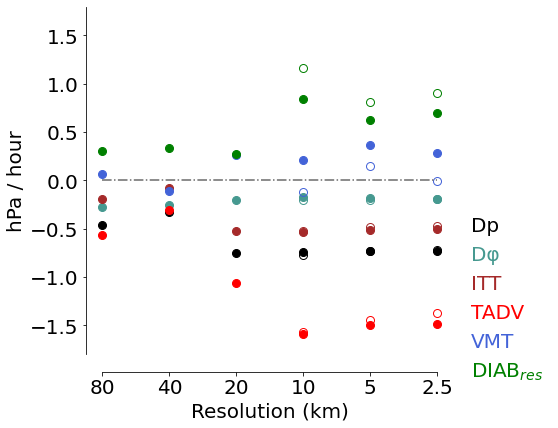

In [9]:
from pylab import figure, show, legend, ylabel

fig=plt.figure(figsize=(6,6.4))
plt.rcParams.update({'font.size': 20})

x1=['80','40','20','10','5','2.5'] 

ax1 = fig.add_subplot(111)

ax1.plot(x1,dP_dt[:6], linewidth=0, marker='o', markersize=8, color='black', clip_on=False)
ax1.plot(x1[3:6],dP_dt[6:], linewidth=0, marker='o', markersize=8, markerfacecolor='None', color='black', clip_on=False)

ax1.plot(x1,dfi_dt[:6], linewidth=0, marker='o', markersize=8, color='#469990', clip_on=False)
ax1.plot(x1[3:6],dfi_dt[6:], linewidth=0, marker='o', markersize=8, markerfacecolor='None', color='#469990', clip_on=False)

ax1.plot(x1,ITT[:6], linewidth=0, marker='o', markersize=8, color='brown', clip_on=False)
ax1.plot(x1[3:6],ITT[6:], linewidth=0, marker='o', markersize=8, markerfacecolor='None', color='brown', clip_on=False)

ax1.plot(x1,TADV[:6], linewidth=0, marker='o', markersize=8, color='red', clip_on=False)
ax1.plot(x1[3:6],TADV[6:], linewidth=0, marker='o', markersize=8, markerfacecolor='None', color='red', clip_on=False)

ax1.plot(x1,VMT[:6], linewidth=0, marker='o', markersize=8, color='#4363d8', clip_on=False)
ax1.plot(x1[3:6],VMT[6:], linewidth=0, marker='o', markersize=8, markerfacecolor='None', color='#4363d8', clip_on=False)

ax1.plot(x1,DIAB_res[:6], linewidth=0, marker='o', markersize=8, color='green', clip_on=False)
ax1.plot(x1[3:6],DIAB_res[6:], linewidth=0, marker='o', markersize=8, markerfacecolor='None', color='green', clip_on=False)


ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.xaxis.set_ticks_position('bottom')
ax1.spines['bottom'].set_position(('axes', -0.05))
ax1.yaxis.set_ticks_position('left')
ax1.spines['left'].set_position(('axes', -0.05))
ax1.tick_params(axis='x', direction='out')
ax1.tick_params(axis='y', direction='out')
plt.xlim('80', '2.5')
ax1.set_xlabel("Resolution (km)")
ax1.set_ylabel("hPa / hour")

##########################################for plotting legend###################################

ax1.plot(x1,dP_dt[:6], label='Dp', linewidth=0, marker='o', markersize=0, color='black', clip_on=False)
ax1.plot(x1,dfi_dt[:6], label='Dφ', linewidth=0, marker='o', markersize=0, color='#469990', clip_on=False)
ax1.plot(x1,ITT[:6],  label='ITT', linewidth=0, marker='o', markersize=0, color='brown', clip_on=False)
ax1.plot(x1,TADV[:6],  label='TADV', linewidth=0, marker='o', markersize=0, color='red', clip_on=False)
ax1.plot(x1,VMT[:6],  label='VMT', linewidth=0, marker='o', markersize=0, color='#4363d8', clip_on=False)
ax1.plot(x1,DIAB_res[:6],  label='DIAB$_{res}$', linewidth=0, marker='o', markersize=0, color='green', clip_on=False)


leg = plt.legend(loc='best', bbox_to_anchor=(1, 0.45), handlelength=0, frameon=False)
for line, text in zip(leg.get_lines(), leg.get_texts()):
   text.set_color(line.get_color())

plt.axhline(y=0, color='dimgray', linestyle='-.')
plt.ylim(-1.8,1.8)

plt.show()